<a href="https://colab.research.google.com/github/danielstarodubtsev/MIPT-python-lab-work/blob/lab/Copy_of_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
# your code here

interesting = [
    "Водитель",
    "Продавец",
    "Бухгалтер",
    "Кладовщик",
    "Разработчик",
]

vacancies = []

for cur in interesting:
  vacancies.append(requests.get("https://api.hh.ru/vacancies",
                          {
                              "text": cur,
                              "area": 1,
                              "page": 0,
                              "per_page": 50,
                          }).json())
  print(f"{vacancies[-1]['found']} вакансий на должность {cur}")


5881 вакансий на должность Водитель
17571 вакансий на должность Продавец
6033 вакансий на должность Бухгалтер
7971 вакансий на должность Кладовщик
21175 вакансий на должность Разработчик


(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
# your code here

total = 0

for cur in vacancies:
  total += cur["found"]

print(f"Всего вакансий {total}")

Всего вакансий 58631


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    # your code here

    def __init__(self, name, latitude, longitude):
      self.name = name
      self.latitude = latitude
      self.longitude = longitude

    def __eq__(self, other):
      return self.name == other.name

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
# your code here

companies = []
vacancies_with_coords = []

for cur_job, cur_data in zip(interesting, vacancies):
  cur_companies = []

  for cur_page in range(cur_data["pages"]):
    local_data = requests.get("https://api.hh.ru/vacancies",
                              {
                                "text": cur_job,
                                "area": 1,
                                "page": cur_page,
                                "per_page": 50,
                              }).json()
    for item in local_data["items"]:
      if item["address"]:
        coords = (item["address"]["lat"], item["address"]["lng"])
        vacancies_with_coords.append(item)
      else:
        coords = (None, None)

      cur_company = Company(item["employer"]["name"], *coords)

      if cur_company not in companies:
        companies.append(cur_company)

print(f"Всего по нашим вакансиям найдено различных компаний: {len(companies)}")

Всего по нашим вакансиям найдено различных компаний: 6324


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
# your code here

print(f"У {len(vacancies_with_coords)} вакансий заданы координаты")

У 6973 вакансий заданы координаты


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
 # your code here

inside_mcad = []

for vacancy in vacancies_with_coords:
  lat = vacancy["address"]["lat"]
  lng = vacancy["address"]["lng"]

  if not lat or not lng:
    continue

  if 55.545493 <= lat <= 55.931762 and \
     37.344287 <= lng <= 37.879998:
    inside_mcad.append(vacancy)

print(f"Всего внутри МКАДа найдено {len(inside_mcad)} вакансий")

Всего внутри МКАДа найдено 5985 вакансий


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

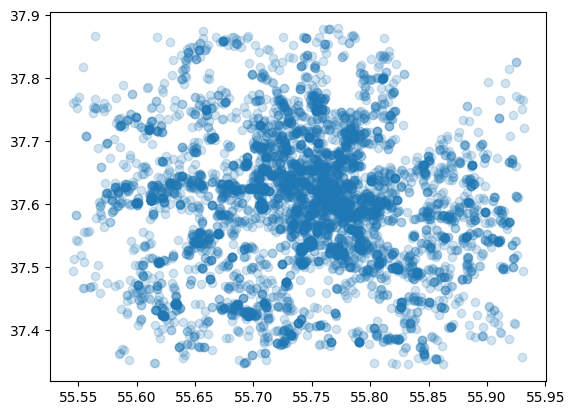

In [ ]:
# your code here

lats = []
lngs = []

for vacancy in inside_mcad:
  lats.append(vacancy["address"]["lat"])
  lngs.append(vacancy["address"]["lng"])

plt.scatter(lats, lngs, alpha=0.2)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
# your code here

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Ваши выводы здесь :)

Какие выводы мы можем сделать, взглянув на наши данные?

Во-первых, спрос на различные профессии, как требующие квалификации, так и нет, весьма велик, и судя по тому, что мы видим десятки тысяч вакансий по одной профессии, вероятно, предложения по этим вакансиям не хватает, чтобы покрыть спрос. Особенно он велик в центре москвы, где мы видим огромное скопление всевозможных вакансий.

Во-вторых (необходимый код не представлен, т.к. нет такого задания), можно убедиться, что весьма высока по модулю корреляция между расстоянием до центра москвы и зарплатой (чем ближе к центру, тем выше зарплата), что и неудивительно

В-третьих, мы видим, что практически во всех районах москвы требуются всевозможные работники, за исключением северо-востока, где на карте практически пусто. Вероятно, это связано с тем, что там располагается огромный лесопарк.



## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 73.7MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
# your code here

diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
# your code here

print(len(diamonds))

219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
# your code here

min_found = 1e9
max_found = 0
min_index = None
max_index = None

for index, data in diamonds.iterrows():
  if data["total_sales_price"] < min_found:
    min_found = data["total_sales_price"]
    min_index = index

  if data["total_sales_price"] > max_found:
    max_found = data["total_sales_price"]
    max_index = index

print(f"{max_index} - {max_found}")
print(f"{min_index} - {min_found}")

219702 - 1449881
0 - 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
# your code here

columns_with_null = []
total_null = 0

for index, column in enumerate(diamonds.columns.values):
  null_here = diamonds.isnull().sum()[index] + \
              len(diamonds[diamonds[column] == "unknown"])
  total_null += null_here

  if null_here:
    columns_with_null.append(column)

print(f"Всего пропусков {total_null}")

Всего пропусков 1891168


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
# your code here

print("\n".join(columns_with_null))

color
cut_quality
eye_clean
culet_size
culet_condition
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
# your code here

no_info_columns = []

for column in diamonds.columns.values:
  if column.startswith("fancy_color_") or column.startswith("fluor_"):
    no_info_columns.append(column)

print(f"Всего малоинформативных колонок {len(no_info_columns)}")

Всего малоинформативных колонок 6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:
# your code here

total = 0

for column in no_info_columns:
  proper_values = len(diamonds) - diamonds[column].isnull().sum() - \
                  len(diamonds[diamonds[column] == "unknown"])
  total += proper_values
  print(f"{column} - всего {proper_values} информативных значений")

print()
print(f"Всего информативных значений {total}")

fluor_color - всего 15726 информативных значений
fluor_intensity - всего 76084 информативных значений
fancy_color_dominant_color - всего 9164 информативных значений
fancy_color_secondary_color - всего 1062 информативных значений
fancy_color_overtone - всего 388 информативных значений
fancy_color_intensity - всего 9162 информативных значений

Всего информативных значений 111586


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
# your code here

diamonds = diamonds.drop(columns=no_info_columns)
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
# your code here

no_info_columns = []

for column in diamonds.columns.values:
  if column.startswith("culet_"):
    no_info_columns.append(column)

print(f"Всего малоинформативных колонок {len(no_info_columns)}\n")

total = 0

for column in no_info_columns:
  proper_values = len(diamonds) - diamonds[column].isnull().sum() - \
                  len(diamonds[diamonds[column] == "unknown"])
  total += proper_values
  print(f"{column} - всего {proper_values} информативных значений")

print()
print(f"Всего информативных значений {total}")

diamonds = diamonds.drop(columns=no_info_columns)

print("Колонки, начинающиеся на culet_, были удалены из датасета")

Всего малоинформативных колонок 2

culet_size - всего 133963 информативных значений
culet_condition - всего 15319 информативных значений

Всего информативных значений 149282
Колонки, начинающиеся на culet_, были удалены из датасета


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
# your code here

price = diamonds["total_sales_price"].sum()

print(f"Стоил бы {price / 1000} тысяч долларов")

Стоил бы 1517721.991 тысяч долларов


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
# your code here

diamonds[diamonds["Unnamed: 0"] % 2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
# your code here

diamonds[diamonds["Unnamed: 0"] % 6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
# your code here

dataset_for3 = diamonds[["cut", "color", "clarity", "cut_quality", "lab", \
                         "symmetry", "polish", "eye_clean", "girdle_min", \
                         "girdle_max"]]
dataset_for3_ans = diamonds["total_sales_price"]

dataset_for3.head(5)

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# your code here

column_t = np.array(diamonds["total_sales_price"])
column = column_t.reshape(1, len(column_t))
print(column * column_t)

[[        40000         40000         40000 ... 1730529726016
  1822500000000 2102154914161]]


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

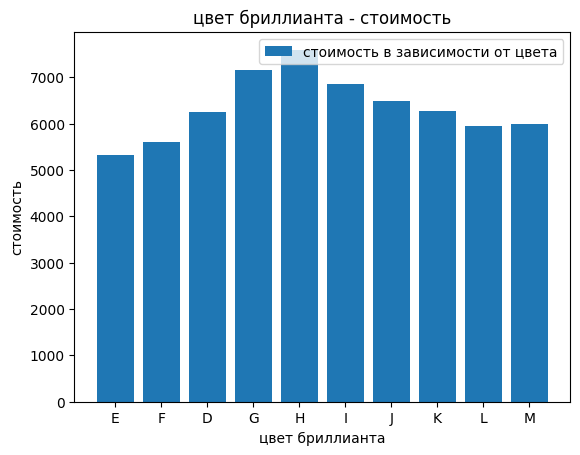

In [ ]:
# your code here

color = []
price = []

for cur_color in dict(diamonds["color"].value_counts()).keys():
  if not cur_color or cur_color == "unknown":
    continue

  cur_price = diamonds[diamonds["color"] == cur_color]["total_sales_price"].mean()

  color.append(cur_color)
  price.append(cur_price)

fig, ax = plt.subplots(1, 1)

ax.bar(color, price)
ax.set_xlabel("цвет бриллианта")
ax.set_ylabel("стоимость")
ax.legend(["стоимость в зависимости от цвета"])
ax.set_title("цвет бриллианта - стоимость")

fig.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

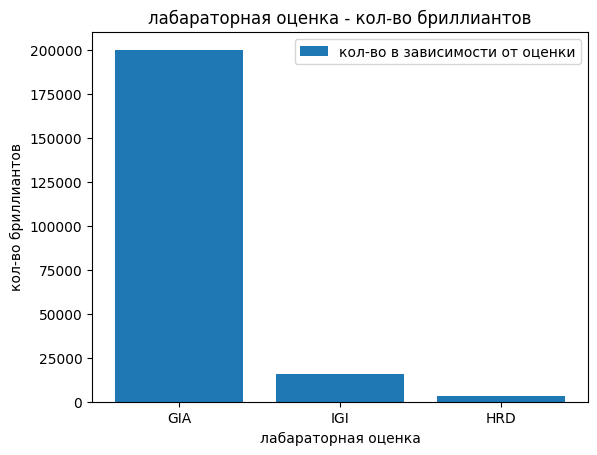

In [ ]:
# your code here

score = []
amount = []

for cur_score in dict(diamonds["lab"].value_counts()).keys():
  if not cur_score or cur_score == "unknown":
    continue

  cur_amount = len(diamonds[diamonds["lab"] == cur_score])

  score.append(cur_score)
  amount.append(cur_amount)

fig, ax = plt.subplots(1, 1)
ax.bar(score, amount)
ax.set_xlabel("лабараторная оценка")
ax.set_ylabel("кол-во бриллиантов")
ax.legend(["кол-во в зависимости от оценки"])
ax.set_title("лабараторная оценка - кол-во бриллиантов")

fig.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


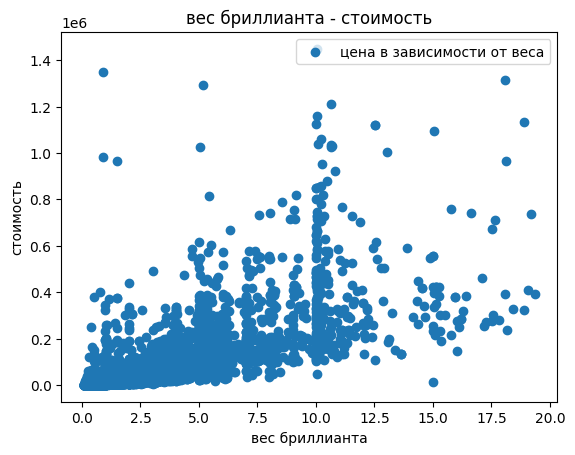

In [ ]:
# your code here

weight = []
price = []

for data in diamonds.iterrows():
  cur_weight = data[1]["carat_weight"]
  cur_price = data[1]["total_sales_price"]

  if not cur_weight or cur_weight == "unknown" or not cur_price or \
     cur_price == "unknown":
     continue

  weight.append(cur_weight)
  price.append(cur_price)

fig, ax = plt.subplots(1, 1)
ax.scatter(weight, price)
ax.set_xlabel("вес бриллианта")
ax.set_ylabel("стоимость")
ax.legend(["цена в зависимости от веса"])
ax.set_title("вес бриллианта - стоимость")

fig.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

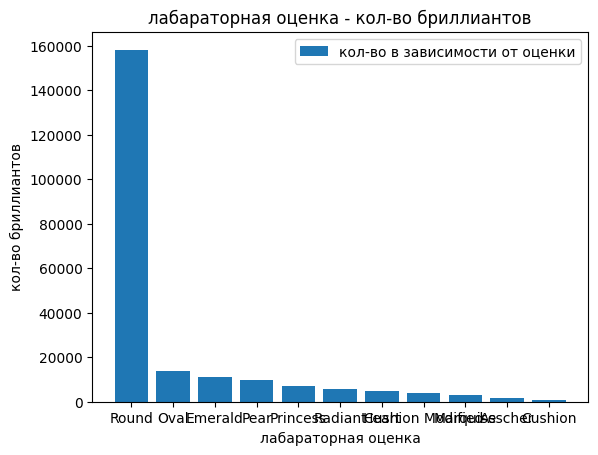

In [ ]:
# your code here

score = []
amount = []

for cur_score in dict(diamonds["cut"].value_counts()).keys():
  if not cur_score or cur_score == "unknown":
    continue

  cur_amount = len(diamonds[diamonds["cut"] == cur_score])

  score.append(cur_score)
  amount.append(cur_amount)

fig, ax = plt.subplots(1, 1)
ax.bar(score, amount)
ax.set_xlabel("лабараторная оценка")
ax.set_ylabel("кол-во бриллиантов")
ax.legend(["кол-во в зависимости от оценки"])
ax.set_title("лабараторная оценка - кол-во бриллиантов")

fig.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

1) Цвет бриллианта не очень сильно влияет на стоимость, однако зависимость все же есть, самый дорогой цвет - Н, самый дешевый - Е

2) Подавляющее большинство бриллиантов имеет лабораторную оценку GIA, то есть она с огромным отрывом является самой популярной среди всех

3) Имеется очевидная положительная корреляция между размером бриллианта и его ценой - что неудивительно

4) В системе оценки GIA cut подавляющее большинство бриллиантов являются "round"

Для дальнейшего анализа датасета лучше всего избавиться от очевидных выбросов и добиться более равномерного распределения бриллантов по категориальным признакам, избавившись от части данных

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
# your code here

diamonds = diamonds[["meas_length", "meas_width", \
                     "meas_depth", "total_sales_price"]]

diamonds.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
# your code here

diamonds = diamonds.sample(frac=1).reset_index(drop=True)
diamonds.head()

,meas_length,meas_width,meas_depth,total_sales_price
0,6.34,6.38,4.01,8697
1,3.63,3.64,2.27,720
2,4.93,4.98,3.21,2594
3,13.78,8.89,4.67,140826
4,5.35,3.69,2.35,1050


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
# your code here

diamonds["sum_dimensions"] = diamonds["meas_length"] + \
                             diamonds["meas_width"] + diamonds["meas_depth"]
diamonds.head()

,meas_length,meas_width,meas_depth,total_sales_price,sum_dimensions
0,6.34,6.38,4.01,8697,16.73
1,3.63,3.64,2.27,720,9.54
2,4.93,4.98,3.21,2594,13.12
3,13.78,8.89,4.67,140826,27.34
4,5.35,3.69,2.35,1050,11.39


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
# your code here

answers = diamonds[['total_sales_price', "sum_dimensions"]]
quests = diamonds.drop(['total_sales_price', "sum_dimensions"], axis=1)

answers.head(5)

,total_sales_price,sum_dimensions
0,8697,16.73
1,720,9.54
2,2594,13.12
3,140826,27.34
4,1050,11.39


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
# your code here

qst_train, qst_test, ans_train, ans_test = train_test_split(quests, answers,
                                           test_size=2/8, random_state=179)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


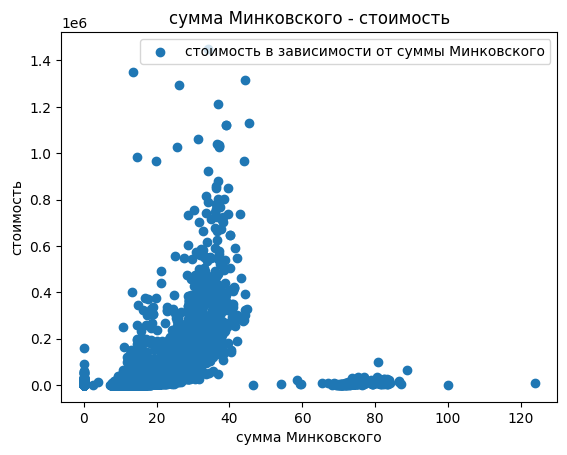

In [ ]:
# your code here

fig, ax = plt.subplots(1, 1)
ax.scatter(ans_train["sum_dimensions"], ans_train["total_sales_price"])
ax.set_xlabel("сумма Минковского")
ax.set_ylabel("стоимость")
ax.legend(["стоимость в зависимости от суммы Минковского"])
ax.set_title("сумма Минковского - стоимость")

fig.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

<ipython-input-174-7c6c71f00c27>:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(ans_train["sum_dimensions"], ans_train["total_sales_price"],
<ipython-input-174-7c6c71f00c27>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(ans_test["sum_dimensions"], ans_test["total_sales_price"],


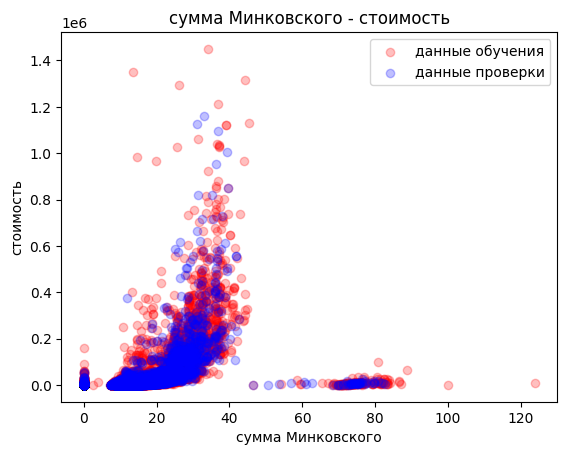

In [ ]:
# your code here

fig, ax = plt.subplots(1, 1)
ax.scatter(ans_train["sum_dimensions"], ans_train["total_sales_price"],
           c=(1, 0, 0, 0.25))
ax.scatter(ans_test["sum_dimensions"], ans_test["total_sales_price"],
           c=(0, 0, 1, 0.25))
ax.set_xlabel("сумма Минковского")
ax.set_ylabel("стоимость")
ax.legend(["данные обучения", "данные проверки"])
ax.set_title("сумма Минковского - стоимость")

fig.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
# your code here

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
# your code here

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

dataset = dataset_for3.copy()
dataset_ans = dataset_for3_ans.copy()
dataset = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(dataset))

dataset.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

qst_train, qst_test, ans_train, ans_test = train_test_split(dataset, dataset_ans,
                                           test_size=2/8, random_state=179)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

model = DecisionTreeRegressor(max_depth = 5)
model.fit(qst_train, ans_train)
prediction = model.predict(qst_test)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

print("Ошибка, если использовать все признаки")
sklearn.metrics.mean_squared_error(ans_test, prediction)

Ошибка, если использовать все признаки


683234716.138

In [ ]:
dataset = dataset_for3.copy()
dataset_ans = dataset_for3_ans.copy()

first = "cut"
second = "symmetry"

dataset = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(
                       dataset[[first, second]]))
qst_train, qst_test, ans_train, ans_test = train_test_split(dataset, dataset_ans,
                                           test_size=2/8, random_state=179)

model = DecisionTreeRegressor(max_depth = 5)
model.fit(qst_train, ans_train)
prediction = model.predict(qst_test)

print(f"Ошибка, если использовать только признаки {first} и {second}")
sklearn.metrics.mean_squared_error(ans_test, prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Ошибка, если использовать только признаки cut и symmetry


693859362.8868759

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)

Полным перебором всех возможностей, выяснил, что наилучшие два признака - cut и symmetry, тренировка модели на них дает результат лишь немногим хуже, чем на всех признаках

Вопреки ожиданиям, увеличение максимальной глубины дерева привело к ухудшению результатов ввиду переобучения, оптимальной глубиной дерева в данном случае оказалось 5

В любом случае, даже при оптимально выбранной глубине и признаках, ошибка оказывается весьма велика, видимо, предсказать стоимость алмаза по его характеристикам действительно очень нелегко + возможно сказывается тот факт, что мы не очистили данные от выбросов, которые явно видны на графиках выше (алмазы огромного размера почему-то стоят мало, а близкого к нулю - почему-то много)

Возможно, стоит использовать другие виды нейросетей и выбрать из них оптимальную, или как-то улучшить наш датасет